# Gamma Correction

In [1]:
(ns squealing-valley
  (:require
    [opencv4.utils :as u]
    [opencv4.core :refer :all]))

nil

## Create a lookup LUT table from a 1 channel mat

In [2]:
(defn lookup-mat [_gamma] 
  (let[lut-mat (new-mat 1 256 CV_8UC1) ]
    (doseq [i (range 1 256)]  
      (.put lut-mat 0 i (double-array [(int (* 255 (Math/pow (/ i 255) (/ 1 _gamma))) )] )))
    lut-mat))

#'squealing-valley/lookup-mat

## Changing the gamma level equals applying the opencv lut function

We first create the lookup table from the gamma value and then call the opencv LUT function.

In [4]:
(defn gamma [img _gamma]
 (let [ out (clone img)]
  (lut img (lookup-mat _gamma) out)
   out))

#'squealing-valley/gamma

## Correct Gamma using the above function and a gamma value of 30

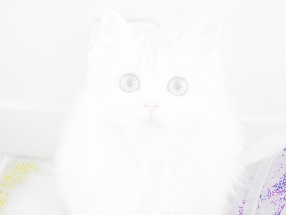

In [5]:
(-> "resources/chapter02/emilie1.jpg"
    (imread)
    (u/resize-by 0.07) 
    (gamma 30) 
    (u/>>>))

## Correct Gamma using the gamma function and multiple gamma values

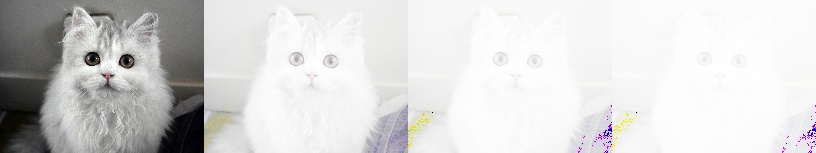

In [8]:
(let [img (-> "resources/chapter02/emilie1.jpg" (imread) (u/resize-by 0.05) )]
  (u/>>> (hconcat! [img (-> img (gamma 10)) (-> img (gamma 25)) (-> img (gamma 50)) ])))